In [30]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [31]:
df = pd.read_csv(pm.get_data('test_scores.csv'), index_col=0)
display(df.head())

,score,male,siblings,family_inv,non_english,prev_disab,age_test,non_severe_hl,mother_hs,early_ident,non_white
0,40,0,2.0,2.0,False,NaN,55,1.0,NaN,False,False
1,31,1,0.0,NaN,False,0.0,53,0.0,0.0,False,False
2,83,1,1.0,1.0,True,0.0,52,1.0,NaN,False,True
3,75,0,3.0,NaN,False,0.0,55,0.0,1.0,False,False
5,62,0,0.0,4.0,False,1.0,50,0.0,NaN,False,False


([<matplotlib.axis.XTick at 0x14c69b3d0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140')])

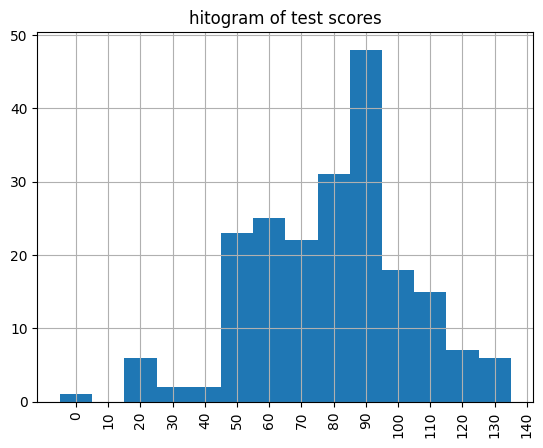

In [32]:
bins = np.arange(0, 150, 10)
fig, ax = plt.subplots()
df['score'].hist(bins=bins, align='left', ax=ax)
ax.set_xticks(bins)
ax.set_xticklabels(bins, rotation=90)
plt.title('hitogram of test scores')
plt.xticks(bins)

In [33]:
df.describe()

,score,male,siblings,family_inv,prev_disab,age_test,non_severe_hl,mother_hs
count,207.000000,207.000000,207.000000,174.000000,189.000000,207.000000,207.000000,134.000000
mean,84.193237,0.512077,1.125604,0.977011,0.238095,53.545894,0.415459,0.701493
std,24.885590,0.501066,0.866682,1.002621,0.427049,3.631920,0.493996,0.459320
min,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000
25%,68.000000,0.000000,1.000000,0.000000,0.000000,50.000000,0.000000,0.000000
50%,87.000000,1.000000,1.000000,1.000000,0.000000,54.000000,0.000000,1.000000
75%,98.000000,1.000000,2.000000,2.000000,0.000000,57.000000,1.000000,1.000000
max,144.000000,1.000000,3.000000,4.000000,1.000000,59.000000,1.000000,1.000000


In [34]:
# データ件数の確認
print(f'データ件数: {len(df)}')

# 欠損値の確認
print(df.isnull().sum())

データ件数: 207
score             0
male              0
siblings          0
family_inv       33
non_english       0
prev_disab       18
age_test          0
non_severe_hl     0
mother_hs        73
early_ident       0
non_white         0
dtype: int64


In [35]:
# 欠損値除去
df1 = df.dropna().astype(float)

# データ件数の確認
print(f'データ件数: {len(df1)}')

データ件数: 101


In [36]:
y = df1.pop("score")
X = df1.copy()

# Xの確認
display(X.head())

,male,siblings,family_inv,non_english,prev_disab,age_test,non_severe_hl,mother_hs,early_ident,non_white
7,0.0,2.0,3.0,1.0,1.0,50.0,1.0,1.0,0.0,1.0
12,1.0,1.0,0.0,0.0,0.0,48.0,1.0,1.0,1.0,0.0
14,0.0,2.0,0.0,0.0,0.0,58.0,1.0,1.0,1.0,1.0
19,1.0,0.0,2.0,0.0,0.0,50.0,1.0,1.0,0.0,1.0
21,1.0,1.0,2.0,0.0,1.0,58.0,0.0,0.0,1.0,1.0


In [37]:
# Xの標準化
X -= X.mean()
X /= X.std()

# 結果の確認
display(X.head())

,male,siblings,family_inv,non_english,prev_disab,age_test,non_severe_hl,mother_hs,early_ident,non_white
7,-1.004938,1.078165,2.227502,2.480475,1.782293,-0.978004,1.179344,0.616250,-0.772789,1.132532
12,0.985234,-0.080289,-0.911722,-0.399157,-0.555520,-1.562492,1.179344,0.616250,1.281203,-0.874235
14,-1.004938,1.078165,-0.911722,-0.399157,-0.555520,1.359947,1.179344,0.616250,1.281203,1.132532
19,0.985234,-1.238742,1.181094,-0.399157,-0.555520,-0.978004,1.179344,0.616250,-0.772789,1.132532
21,0.985234,-0.080289,1.181094,-0.399157,1.782293,1.359947,-0.839533,-1.606652,1.281203,1.132532


In [38]:
# データ変数とデータ項目数の設定
N, D = X.shape

# 項目名一覧をcolumunsに設定する
columns = X.columns.values

# 結果確認
print(f'N: {N} (データ数)')
print(f'D: {D} (説明変数項目)')
print(f'項目一覧 : {columns}')

N: 101 (データ数)
D: 10 (説明変数項目)
項目一覧 : ['male' 'siblings' 'family_inv' 'non_english' 'prev_disab' 'age_test'
 'non_severe_hl' 'mother_hs' 'early_ident' 'non_white']


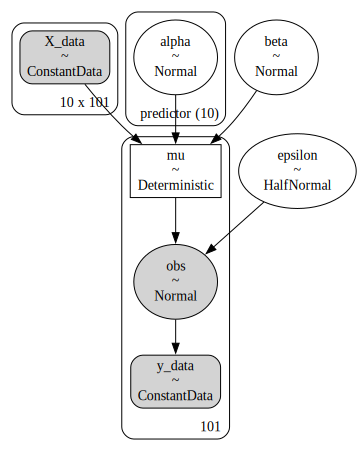

In [46]:
# 説明変数リストをpredictorとして定義
model1 = pm.Model(coords={'predictor': columns})

with model1:
    # Xは従来のベクトルが行列になる。転地していることに注意
    X_data = pm.ConstantData('X_data', X.T)

    # yが回帰モデルの目的変数
    y_data = pm.ConstantData('y_data', y)

    # 単回帰のときスカラーだったalphaは重回帰ではベクトルになる
    alpha = pm.Normal('alpha', mu=0.0, sigma=10.0, dims='predictor')

    # betaとepsilonは単回帰と同じ
    beta = pm.Normal('beta', mu=100.0, sigma=25.0)
    epsilon = pm.HalfNormal('epsilon', sigma=25.0)

    # muの計算では、単回帰のときの掛け算が内積に変わる
    mu = pm.Deterministic('mu', alpha @ X_data + beta)

    obs = pm.Normal('obs', mu=mu, sigma=epsilon, observed=y_data)

g = pm.model_to_graphviz(model1)
display(g)

In [47]:
with model1:
    idata1 = pm.sample(random_seed=42, target_accept=0.95)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


NameError: name 'az' is not defined

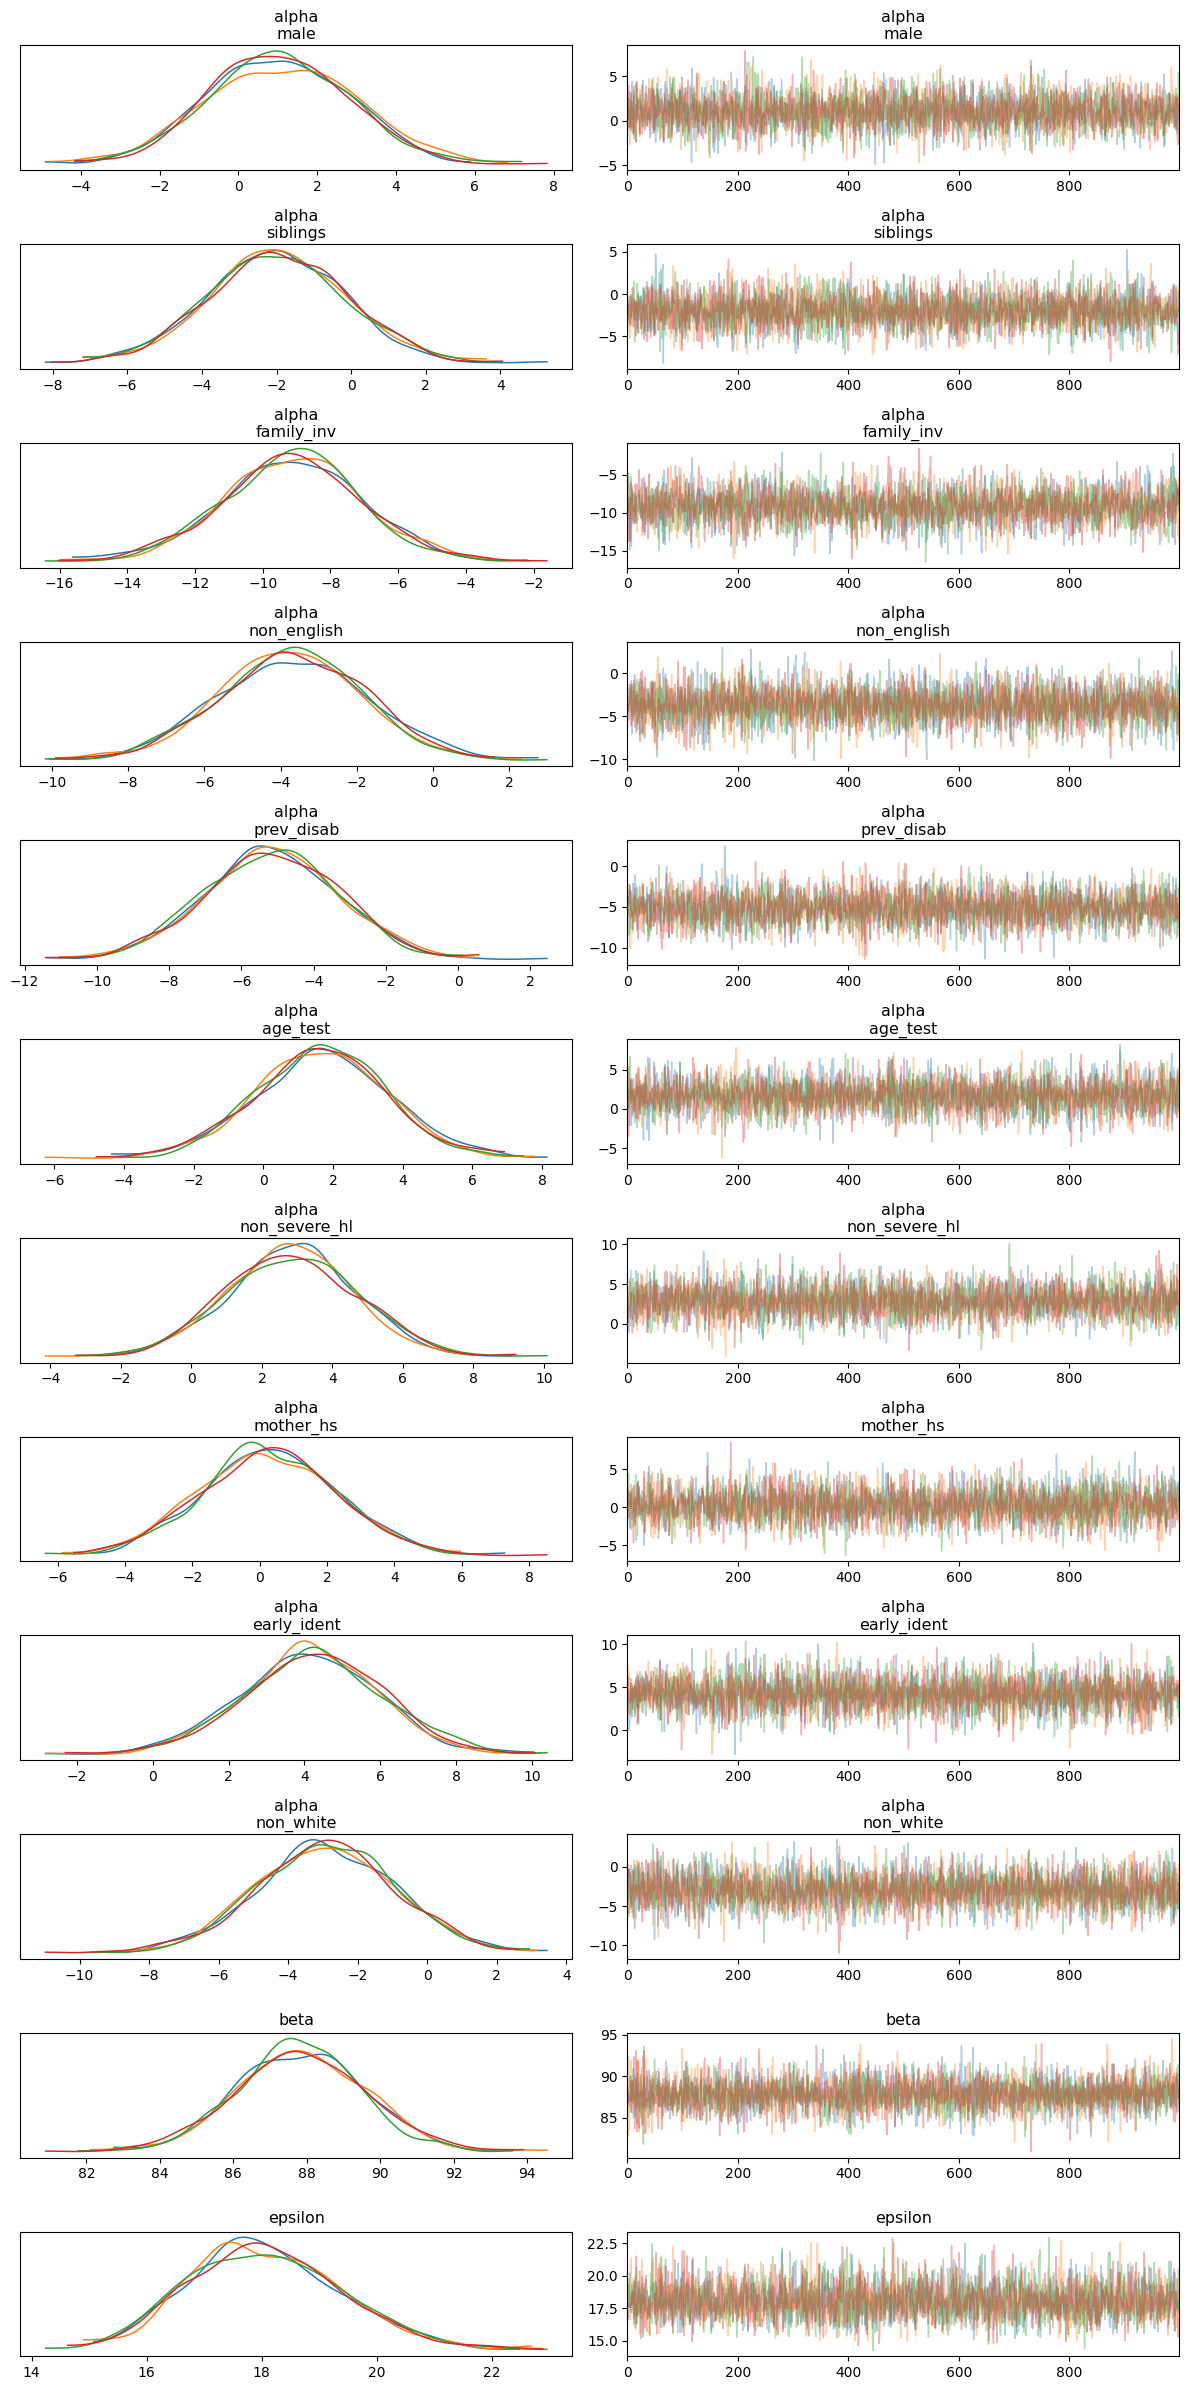

In [48]:
import arviz as az
# plot_trace関数で推論結果の確認
az.plot_trace(idata1, var_names=['alpha', 'beta', 'epsilon'], compact=False)
plt.tight_layout()

In [49]:
summary1 = az.summary(idata1, var_names=['alpha'])
display(summary1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[male],1.034,1.808,-2.254,4.426,0.030,0.026,3657.0,2822.0,1.0
alpha[siblings],-1.990,1.828,-5.098,1.786,0.028,0.023,4246.0,2931.0,1.0
alpha[family_inv],-9.136,2.054,-13.191,-5.414,0.036,0.025,3324.0,2868.0,1.0
alpha[non_english],-3.728,1.911,-7.274,-0.072,0.029,0.022,4378.0,2932.0,1.0
alpha[prev_disab],-5.153,1.838,-8.479,-1.626,0.029,0.021,3945.0,3012.0,1.0
alpha[age_test],1.656,1.881,-1.966,5.181,0.029,0.023,4303.0,3088.0,1.0
alpha[non_severe_hl],2.837,1.828,-0.497,6.330,0.029,0.022,4072.0,3101.0,1.0
alpha[mother_hs],0.272,2.007,-3.204,4.324,0.033,0.028,3673.0,3142.0,1.0
alpha[early_ident],4.196,1.806,0.654,7.509,0.026,0.019,4786.0,3054.0,1.0
alpha[non_white],-2.904,1.987,-6.619,0.786,0.032,0.024,3773.0,2882.0,1.0


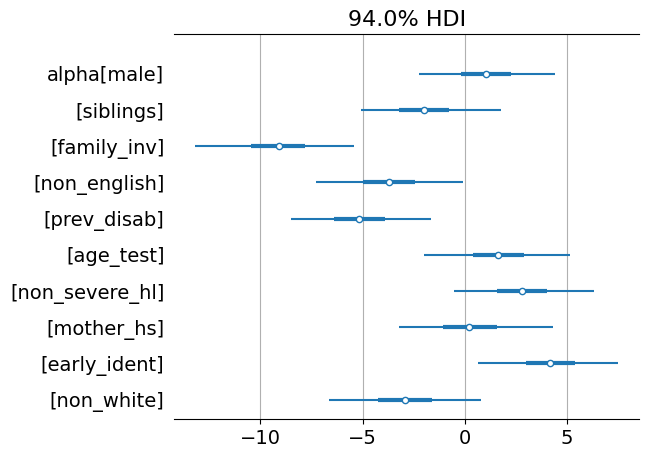

In [57]:
# plot_forest関数で推論結果の確認
az.plot_forest(idata1, var_names=['alpha'], combined=True)

# グラフに横軸のみグリッドを表示
plt.grid(axis='x')